In [5]:
import ca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:


transfer = ca.CA()

hair_eye = pd.read_csv("./datasets/hair_eye.csv", index_col=0)
print(hair_eye.head())

            Fair  Red  Medium  Dark  Black
Eye Colors                                
Blue         326   38     241   110      3
Light        688  116     584   188      4
Medium       343   84     909   412     26
Dark          98   48     403   681     85


In [7]:
transfer.fit(hair_eye)
print('centered correspondence matrix:')
print(transfer.centr_corrspnd_mat_)

print('Pearson residual:')
print(transfer.pearson_resd_)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=hair_eye.index,
                                   col_categories=hair_eye.columns)
print('Principal coordinates of row variables in DataFrame:')
print(pcs_row)
print(pcs_col)

centered correspondence matrix:
[[ 2.45168044e-02 -2.21228501e-05 -8.13579874e-03 -1.39962520e-02
  -2.36263080e-03]
 [ 4.84964577e-02  5.96186689e-03 -7.94120725e-03 -4.08350597e-02
  -5.68205763e-03]
 [-2.52734265e-02 -1.89029761e-03  3.81031634e-02 -8.55244575e-03
  -2.38699350e-03]
 [-4.77398356e-02 -4.04944643e-03 -2.20261574e-02  6.33837575e-02
   1.04316819e-02]]
Pearson residual:
[[ 0.12921625 -0.00026299 -0.03538203 -0.07544543 -0.04372599]
 [ 0.17230463  0.04777687 -0.02328106 -0.14838434 -0.07088969]
 [-0.0847428  -0.01429609  0.10542144 -0.02932898 -0.02810479]
 [-0.18592317 -0.03557105 -0.07078163  0.25246345  0.14265843]]
Principal coordinates of row variables in DataFrame:
               Dim 0     Dim 1     Dim 2
Eye Colors                              
Blue       -0.400300  0.165411  0.064158
Light      -0.440708  0.088463 -0.031773
Medium      0.033614 -0.245002  0.005553
Dark        0.702739  0.133914 -0.004345
           Dim 0     Dim 1     Dim 2
Fair   -0.543995  0.

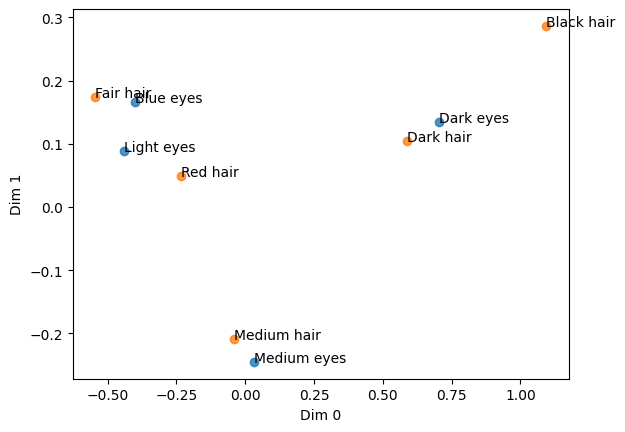

In [8]:

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
for i, txt in enumerate(list(hair_eye.index)):
    ax.annotate(txt + ' eyes',
                (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i, txt in enumerate(list(hair_eye.columns)):
    ax.annotate(txt + ' hair',
                (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1']))
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()